# Installing important libraries


there are various labraries that we need to use 
this are only the few librareis that we need to install


In [40]:
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install quandl


In [41]:
!pip install quandl



In [42]:
!pip install tensorflow
!pip show tensorflow

Name: tensorflow
Version: 2.3.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: protobuf, astunparse, google-pasta, opt-einsum, wrapt, termcolor, wheel, grpcio, tensorflow-estimator, keras-preprocessing, numpy, tensorboard, scipy, gast, six, h5py, absl-py
Required-by: fancyimpute


#Importing the libraries 
These are the libraries that we will need in this machine learning excersice

In [54]:
import pandas as pd
import quandl #from where we will be importing the data 
#df=quandl.get('WIKI/GOOGL')#to learn more go on the quandle and see token and copy it 
import math
from sklearn import svm,preprocessing, model_selection
from sklearn.linear_model import LinearRegression  
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


In [ ]:
df

In [44]:
df1=df[['Adj. Open','Adj. High','Adj. Low','Adj. Close']]
df1

,Adj. Open,Adj. High,Adj. Low,Adj. Close
Date,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842
2004-08-20,50.661387,54.708881,50.405597,54.322689
2004-08-23,55.551482,56.915693,54.693835,54.869377
2004-08-24,55.792225,55.972783,51.945350,52.597363
2004-08-25,52.542193,54.167209,52.100830,53.164113
...,...,...,...,...
2016-11-04,771.300000,788.480000,771.004300,781.100000
2016-11-07,794.950000,805.000000,792.900000,802.030000
2016-11-08,802.030000,816.040000,799.620000,811.980000


#Calculations 
Calculating the volitility of the stock market 
and by how much the stock has actually changed 

In [45]:
df['volitile_per']=((df['Adj. High']-df['Adj. Low'])/df['Adj. Low'])*100#volitile rates 
df['actual_change']=((df['Adj. Open']-df['Adj. Close'])/df['Adj. Close'])*100#actual change in the stock markets 
df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,volitile_per,actual_change,lable,lable_oneday
Date,,,,,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.9600,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0,8.441017,-0.323915,214.005615,54.322689
2004-08-20,101.01,109.08,100.5000,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0,8.537313,-6.739913,210.725489,54.869377
2004-08-23,110.76,113.48,109.0500,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0,4.062357,1.243144,208.072299,52.597363
2004-08-24,111.24,111.60,103.5700,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0,7.753210,6.074187,218.288837,53.164113
2004-08-25,104.76,108.00,103.8800,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0,3.966115,-1.169811,223.309335,54.122070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-04,771.30,788.48,771.0043,781.100,1970603.0,0.0,1.0,771.300000,788.480000,771.004300,781.100000,1970603.0,2.266615,-1.254641,1094.000000,802.030000
2016-11-07,794.95,805.00,792.9000,802.030,1992570.0,0.0,1.0,794.950000,805.000000,792.900000,802.030000,1992570.0,1.526044,-0.882760,1053.150000,811.980000
2016-11-08,802.03,816.04,799.6200,811.980,1769069.0,0.0,1.0,802.030000,816.040000,799.620000,811.980000,1769069.0,2.053475,-1.225400,1026.550000,805.590000


#Features 
we need to decide some features for our machine learning program 

In [46]:
feature=df[['Adj. Close','Adj. Volume','volitile_per','actual_change']]
feature
feture_col='Adj. Close'

In [47]:
import math


#Data cleaning 

In [48]:
null=df.isnull().sum()# removing the null values fro  the data set 

null.sum()

0

#Shifting the data 
we are shiofting the data so that we can guess the stock price after the certain days 

In [49]:
df.fillna(-99999,inplace=True)

shift=int(math.ceil(0.01*len(df)))# shiting the data by 1 percent 


df['lable']=df[feture_col].shift(-shift)
df['lable_oneday']=df[feture_col].shift(-1)
print(df)
df.dropna(inplace=True)# droping the colomn with na beacuase the number of columns with nan is very low
df

              Open    High       Low  ...  actual_change      lable  lable_oneday
Date                                  ...                                        
2004-08-19  100.01  104.06   95.9600  ...      -0.323915  67.739104     54.322689
2004-08-20  101.01  109.08  100.5000  ...      -6.739913  69.399229     54.869377
2004-08-23  110.76  113.48  109.0500  ...       1.243144  68.752232     52.597363
2004-08-24  111.24  111.60  103.5700  ...       6.074187  69.639972     53.164113
2004-08-25  104.76  108.00  103.8800  ...      -1.169811  69.078238     54.122070
...            ...     ...       ...  ...            ...        ...           ...
2016-11-04  771.30  788.48  771.0043  ...      -1.254641        NaN    802.030000
2016-11-07  794.95  805.00  792.9000  ...      -0.882760        NaN    811.980000
2016-11-08  802.03  816.04  799.6200  ...      -1.225400        NaN    805.590000
2016-11-09  801.83  811.71  792.0350  ...      -0.466739        NaN    780.290000
2016-11-10  810.

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,volitile_per,actual_change,lable,lable_oneday
Date,,,,,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.9600,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0,8.441017,-0.323915,67.739104,54.322689
2004-08-20,101.01,109.08,100.5000,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0,8.537313,-6.739913,69.399229,54.869377
2004-08-23,110.76,113.48,109.0500,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0,4.062357,1.243144,68.752232,52.597363
2004-08-24,111.24,111.60,103.5700,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0,7.753210,6.074187,69.639972,53.164113
2004-08-25,104.76,108.00,103.8800,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0,3.966115,-1.169811,69.078238,54.122070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-22,810.00,819.06,807.7100,815.950,1759290.0,0.0,1.0,810.000000,819.060000,807.710000,815.950000,1759290.0,1.405207,-0.729211,781.100000,814.960000
2016-09-23,815.14,817.00,812.7300,814.960,1411673.0,0.0,1.0,815.140000,817.000000,812.730000,814.960000,1411673.0,0.525390,0.022087,802.030000,802.650000
2016-09-26,809.82,810.08,800.4500,802.650,1472732.0,0.0,1.0,809.820000,810.080000,800.450000,802.650000,1472732.0,1.203073,0.893291,811.980000,810.730000


In [50]:
df[-shift:]

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,volitile_per,actual_change,lable,lable_oneday
Date,,,,,,,,,,,,,,,,
2016-08-16,803.50,804.260,797.0000,801.19,1057897.0,0.0,1.0,803.50,804.260,797.0000,801.19,1057897.0,0.910916,0.288321,802.64,805.42
2016-08-17,800.00,805.630,796.3000,805.42,1066070.0,0.0,1.0,800.00,805.630,796.3000,805.42,1066070.0,1.171669,-0.672941,804.06,802.75
2016-08-18,805.36,808.000,801.6300,802.75,865160.0,0.0,1.0,805.36,808.000,801.6300,802.75,865160.0,0.794631,0.325132,800.38,799.65
2016-08-19,799.79,801.230,796.8800,799.65,1120763.0,0.0,1.0,799.79,801.230,796.8800,799.65,1120763.0,0.545879,0.017508,802.79,796.95
2016-08-22,798.51,799.300,794.3300,796.95,853365.0,0.0,1.0,798.51,799.300,794.3300,796.95,853365.0,0.625685,0.195746,801.23,796.59
2016-08-23,800.48,801.000,795.9900,796.59,917513.0,0.0,1.0,800.48,801.000,795.9900,796.59,917513.0,0.629405,0.488332,803.08,793.60
2016-08-24,796.86,798.460,790.7600,793.60,1284437.0,0.0,1.0,796.86,798.460,790.7600,793.60,1284437.0,0.973747,0.410786,800.71,791.30
2016-08-25,792.00,794.720,787.2300,791.30,1202680.0,0.0,1.0,792.00,794.720,787.2300,791.30,1202680.0,0.951437,0.088462,814.17,793.22
2016-08-26,792.49,799.400,789.4069,793.22,1248881.0,0.0,1.0,792.49,799.400,789.4069,793.22,1248881.0,1.265900,-0.092030,809.57,795.82


#Target 
here we have to decide which is out label/target column


In [51]:
X=np.array(df.drop(['lable'],1))
y=np.array(df['lable'])

#Machine learning



> here we will be appling some algorithms to find outwhich algorithm is better  to predict the stock market and we will also calculate other variables



In [52]:
X=preprocessing.scale(X)
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2)#test size is 20%  
clf=LinearRegression()# using linear regression to predict the stock markets  
clf.fit(X_train,y_train)# fitting the or asking machine to learn the data set 
prediction=clf.predict(X_test)# asking the machine to predict the stock markets

print(mean_absolute_error(y_test,prediction))
s=clf.score(X_test,y_test)# finding out the accuracu the model that we are using 
print(s)

23.457843576533786
0.9732522254376901


#plots

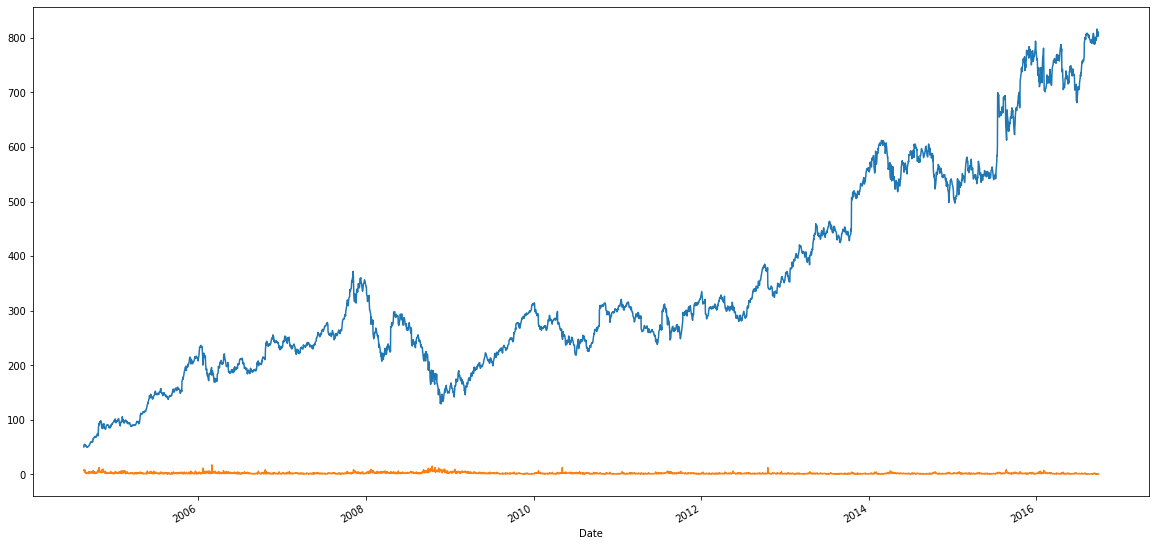

In [55]:
plt.figure(figsize=(20,10))#figure szie

df['Adj. Close'].plot()
df['volitile_per'].plot()
